In [54]:
import xarray as xr

import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import speccy
import nonstat_itides as nsit

In [100]:
ncfiles = {'wp5':
         [
         '../DATA/ROMS/wp5/t1/file_inst_00010101-00010219.nc',
         '../DATA/ROMS/wp5/t1/file_inst_00010220-00010410.nc',
        '../DATA/ROMS/wp5/t2/file_inst_00010101-00010219.nc',
        '../DATA/ROMS/wp5/t2/file_inst_00010220-00010410.nc',
          '../DATA/ROMS/wp5/t3/file_inst_00010101-00010219.nc',
          '../DATA/ROMS/wp5/t3/file_inst_00010220-00010410.nc'
         ],
            'wp8':
         [
         '../DATA/ROMS/wp8/t1/file_inst_00010101-00010219.nc',
         '../DATA/ROMS/wp8/t1/file_inst_00010220-00010410.nc',
        '../DATA/ROMS/wp8/t2/file_inst_00010101-00010219.nc',
        '../DATA/ROMS/wp8/t2/file_inst_00010220-00010410.nc',
          '../DATA/ROMS/wp8/t3/file_inst_00010101-00010219.nc',
          '../DATA/ROMS/wp8/t3/file_inst_00010220-00010410.nc'
         ],
           'wp9':
         [
         '../DATA/ROMS/wp9/t1/file_inst_00010101-00010219.nc',
         '../DATA/ROMS/wp9/t1/file_inst_00010220-00010410.nc',
        '../DATA/ROMS/wp9/t2/file_inst_00010101-00010219.nc',
        '../DATA/ROMS/wp9/t2/file_inst_00010220-00010410.nc',
          '../DATA/ROMS/wp9/t3/file_inst_00010101-00010219.nc',
          '../DATA/ROMS/wp9/t3/file_inst_00010220-00010410.nc'
         ],
          }

scenario = 'wp9'
ds0 = xr.open_mfdataset(ncfiles[scenario][0:2])
ds1 = xr.open_mfdataset(ncfiles[scenario][2:4])
ds2 = xr.open_mfdataset(ncfiles[scenario][4:6])


dt1 = ds0['time_instant'][-1]-ds0['time_instant'][0]
dt2 = ds1['time_instant'][-1]-ds1['time_instant'][0]

ds1['time_instant'] = ds1['time_instant']+dt1
ds2['time_instant'] = ds2['time_instant']+dt1+dt2
ds1['time_counter'] = ds1['time_counter']+dt1
ds2['time_counter'] = ds2['time_counter']+dt1+dt2

ds = xr.concat([ds0, ds1, ds2], dim='time_counter')

In [101]:
ds

<xarray.Dataset>
Dimensions:              (y_rhoy: 722, x_rhoy: 1, s_rho_slice0: 1, y_uy: 722,
                          x_uy: 1, y_vy: 721, x_vy: 1, time_counter: 14400,
                          axis_nbounds: 2)
Coordinates:
    nav_lat_rhoy         (y_rhoy, x_rhoy) float32 -2e+03 2e+03 ... 2.882e+06
    nav_lon_rhoy         (y_rhoy, x_rhoy) float32 5.1e+05 5.1e+05 ... 5.1e+05
  * s_rho_slice0         (s_rho_slice0) float32 -0.01
    nav_lat_uy           (y_uy, x_uy) float32 -2e+03 2e+03 ... 2.882e+06
    nav_lon_uy           (y_uy, x_uy) float32 5.08e+05 5.08e+05 ... 5.08e+05
    nav_lat_vy           (y_vy, x_vy) float32 0.0 4e+03 ... 2.876e+06 2.88e+06
    nav_lon_vy           (y_vy, x_vy) float32 5.1e+05 5.1e+05 ... 5.1e+05
    time_instant         (time_counter) datetime64[ns] dask.array<chunksize=(2400,), meta=np.ndarray>
  * time_counter         (time_counter) datetime64[ns] 1950-01-01T00:15:00 .....
Dimensions without coordinates: y_rhoy, x_rhoy, y_uy, x_uy, y_vy, x_vy,
                                axis_nbounds
Data variables:
    ssh_y                (time_counter, y_rhoy, x_rhoy) float32 dask.array<chunksize=(2400, 722, 1), meta=np.ndarray>
    time_instant_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(2400, 2), meta=np.ndarray>
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(2400, 2), meta=np.ndarray>
    T_y                  (time_counter, s_rho_slice0, y_rhoy, x_rhoy) float32 dask.array<chunksize=(2400, 1, 722, 1), meta=np.ndarray>
    u_y                  (time_counter, s_rho_slice0, y_uy, x_uy) float32 dask.array<chunksize=(2400, 1, 722, 1), meta=np.ndarray>
    v_y                  (time_counter, s_rho_slice0, y_vy, x_vy) float32 dask.array<chunksize=(2400, 1, 721, 1), meta=np.ndarray>
    w_y                  (time_counter, s_rho_slice0, y_rhoy, x_rhoy) float32 dask.array<chunksize=(2400, 1, 722, 1), meta=np.ndarray>
    rot_y                (time_counter, s_rho_slice0, y_rhoy, x_rhoy) float32 dask.array<chunksize=(2400, 1, 722, 1), meta=np.ndarray>
Attributes:
    name:         file_inst
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2019-Sep-26 10:38:00 GMT

In [102]:
ds.time_instant.values

array(['1950-01-01T00:30:00.000000000', '1950-01-01T01:00:00.000000000',
       '1950-01-01T01:30:00.000000000', ...,
       '1950-10-27T22:00:00.000000000', '1950-10-27T22:30:00.000000000',
       '1950-10-27T23:00:00.000000000'], dtype='datetime64[ns]')

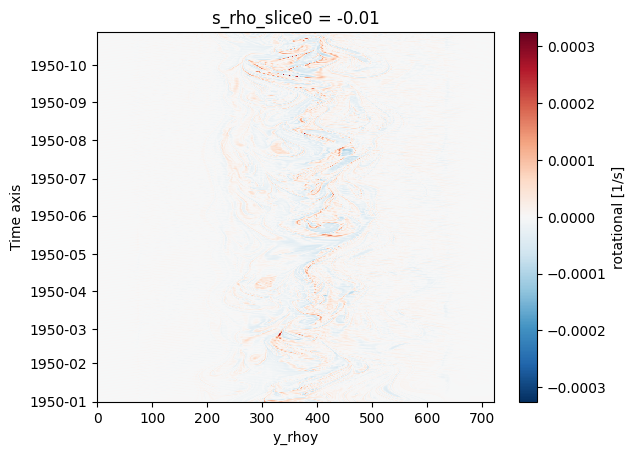

In [103]:
plt.figure()
ds.rot_y.plot()
plt.savefig('../FIGURES/PK2015_ROMS_vorticity_{}.png'.format(scenario), dpi=150)

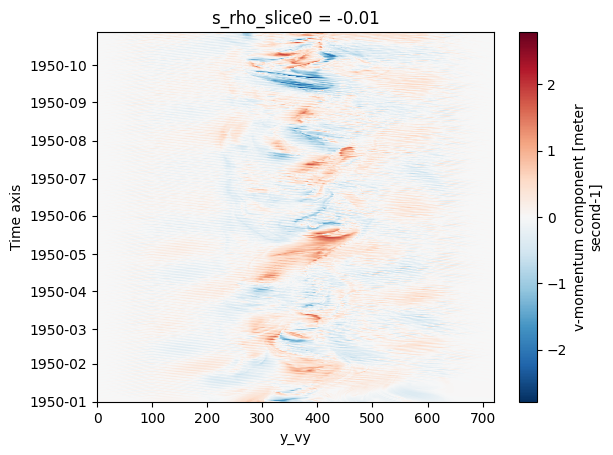

In [104]:
plt.figure()
ds.v_y.plot()
plt.savefig('../FIGURES/PK2015_ROMS_v_{}.png'.format(scenario), dpi=150)

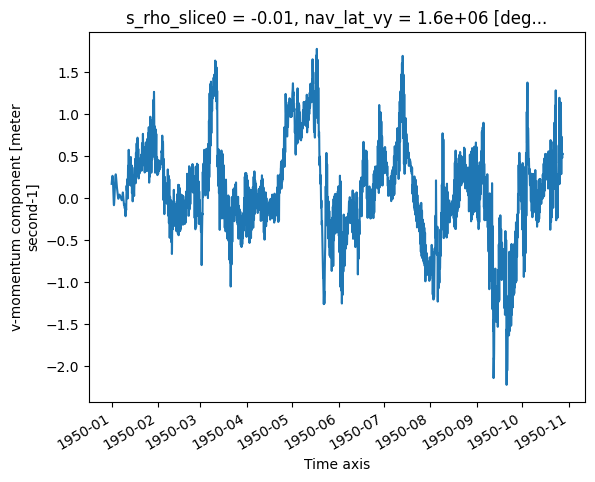

In [105]:
ypt = 400
#y = ds['ssh_y'].sel(y_rhoy=ypt)
y = ds['v_y'].sel(y_vy=ypt)
dt = y['time_instant'][1] - y['time_instant'][0]
dtout = dt.values.astype(float)/1e9/86400
ypr = y.values.ravel()-y.values.mean()
t_ = y['time_instant'] - y['time_instant'][0]
t = t_.values.astype(float)/1e9/86400
plt.figure()
y.plot()

# plt.xlim(y['time_instant'][0], y['time_instant'][500])
plt.savefig('../FIGURES/PK2015_ROMS_v_timeseries_{}.png'.format(scenario), dpi=150)

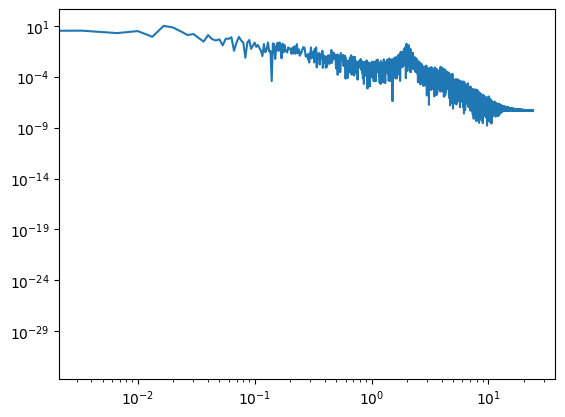

In [106]:

dt = y['time_instant'][1] - y['time_instant'][0]
dtout = dt.values.astype(float)/1e9/86400

y_coherent = nsit.calc_coherent(ypr, t)

f, I =  speccy.periodogram(ypr-y_coherent, delta=dtout)

plt.figure()
ax1=plt.subplot(111)
plt.loglog(f, I)

/data/jupyter-ubuntu/ProjectsActive/incoherentitide/NOTEBOOKS/nonstat_itides.py:44: RuntimeWarning: invalid value encountered in sqrt
  cff1 = np.sqrt(2*nu)*dx/l


[0.54670352 5.17922511 0.71667605]


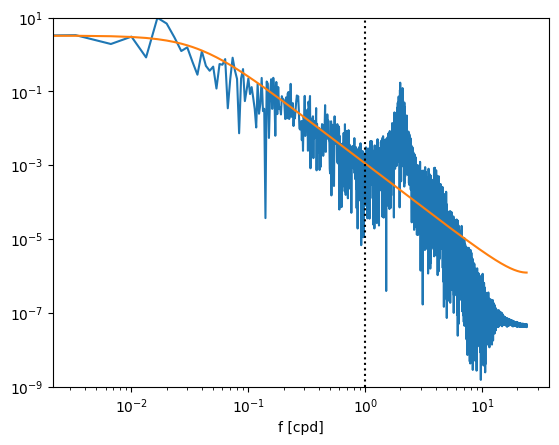

In [107]:
# Test point
covfunc = nsit.matern_general_1d
covparams = (0.1, 10, 2.)
fmin, fmax = 1e-10,1
priors=None
bounds=None

acf1 = covfunc(t, t[0], covparams)
f_S1, S1 = speccy.bochner(acf1, delta=dtout)

inputs = dict(priors=priors, X=t, covfunc=covfunc, covparams_ic=covparams, fmin=fmin, fmax=fmax, 
              method='nelder-mead', bounds=bounds)
soln = nsit.estimate_spectral_params_whittle_ufunc(ypr-y_coherent, **inputs)

print(soln)
acf = covfunc(t, t[0], soln)

f_S, S = speccy.bochner(acf, delta=dtout)
plt.figure()
plt.loglog(f, I)
# plt.loglog(f_S1,S1)
plt.loglog(f_S,S)

# plt.xlim(fmin, fmax)
plt.ylim(1e-9,1e1)

plt.xlabel('f [cpd]')
plt.vlines(fmax, 1e-9,1e1,colors='k',ls=':')

plt.savefig('../FIGURES/PK2015_ROMS_psd_matern_{}.png'.format(scenario), dpi=150)

/data/jupyter-ubuntu/ProjectsActive/incoherentitide/NOTEBOOKS/nonstat_itides.py:349: RuntimeWarning: invalid value encountered in log
  return - 2 * np.sum(np.log(S_boch[idx_boch]) + I[idx]/S_boch[idx_boch])


[0.1613756  1.61165514 1.12318853]


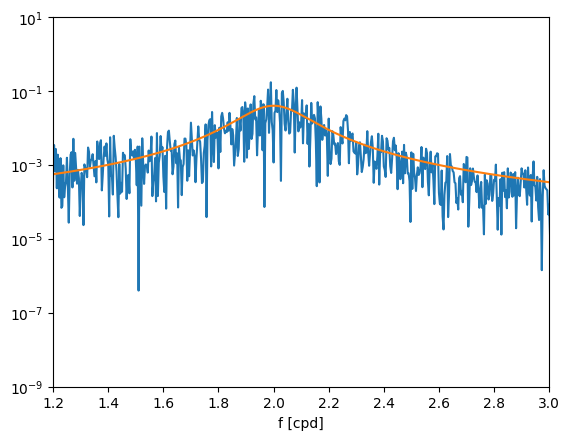

In [108]:
covfunc = nsit.itmodel_gamma
covparams = (0.1, 10, 1.5)
fmin, fmax = 1.2, 3.
priors=None
bounds=None

acf1 = covfunc(t, t[0], covparams)
f_S1, S1 = speccy.bochner(acf1, delta=dtout)

inputs = dict(priors=priors, X=t, covfunc=covfunc, covparams_ic=covparams, fmin=fmin, fmax=fmax, 
              method='nelder-mead', bounds=bounds)
soln = nsit.estimate_spectral_params_whittle_ufunc(ypr-y_coherent, **inputs)
print(soln)
acf = covfunc(t, t[0], soln)

f_S, S = speccy.bochner(acf, delta=dtout)
plt.figure()
plt.semilogy(f, I)
# plt.semilogy(f_S1,S1)
plt.semilogy(f_S,S)

plt.xlim(fmin, fmax)
plt.ylim(1e-9,1e1)

plt.xlabel('f [cpd]')
plt.savefig('../FIGURES/PK2015_ROMS_psd_itgamma_{}.png'.format(scenario), dpi=150)

In [109]:
def meso_itide_matern(x, xpr, params):
    eta_m, d_m, nu_m, eta_i, d_i, nu_i = params
    return nsit.matern_general_1d(x, xpr, (eta_m, d_m, nu_m)) + \
        nsit.itmodel_matern(x, xpr, (eta_i, d_i, nu_i))

def meso_itide_gamma(x, xpr, params):
    eta_m, d_m, gam_m, eta_i, d_i, gam_i = params
    return nsit.gamma_exp_1d(x, xpr, (eta_m, d_m, gam_m)) + \
        nsit.itmodel_gamma(x, xpr, (eta_i, d_i, gam_i))

def meso_matern_itide_gamma(x, xpr, params):
    eta_m, d_m, nu_m, eta_i, d_i, gam_i = params
    return nsit.matern_general_1d(x, xpr, (eta_m, d_m, nu_m)) + \
        nsit.itmodel_gamma(x, xpr, (eta_i, d_i, gam_i))

[0.54343057 5.00130128 0.73698548 0.15615463 1.61907352 1.3485499 ]
CPU times: user 7.82 s, sys: 360 ms, total: 8.18 s
Wall time: 7.8 s


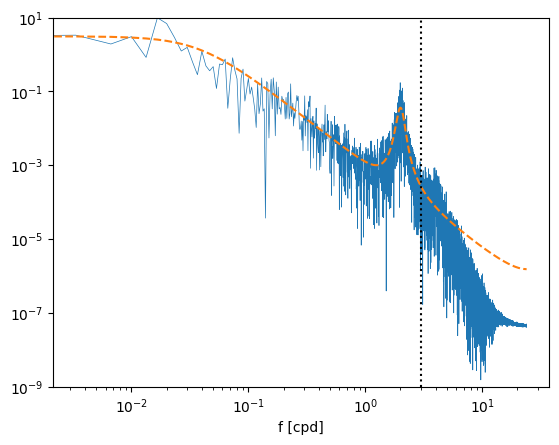

In [110]:
%%time
# covfunc = meso_itide_gamma
# covfunc = meso_itide_matern
covfunc = meso_matern_itide_gamma


covparams = (0.1, 10, 1.5, 0.1, 10, 1.5)
fmin, fmax = 5e-3, 3.
priors=None
bounds=( (1e-15, 1), (1e-15, 50), (0.2, 3), 
    (1e-15, 1), (1e-15, 20), (1, 2-1e-15))
# bounds=( (1e-15, 1), (1e-15, 50), (0.5, 5-1e-15), 
#     (1e-15, 1), (1e-15, 20), (0.5, 5-1e-15))
# bounds = None

acf1 = covfunc(t, t[0], covparams)
f_S1, S1 = speccy.bochner(acf1, delta=dtout)

inputs = dict(priors=priors, X=t, covfunc=covfunc, covparams_ic=covparams, fmin=fmin, fmax=fmax, 
              method='nelder-mead', bounds=bounds)
soln = nsit.estimate_spectral_params_whittle_ufunc(ypr-y_coherent, **inputs)

print(soln)
acf = covfunc(t, t[0], soln)

f_S, S = speccy.bochner(acf, delta=dtout)
plt.figure()
plt.loglog(f, I, lw=0.5)
# plt.loglog(f_S1,S1)
plt.loglog(f_S,S,'--')

# plt.xlim(fmin, fmax)
plt.ylim(1e-9,1e1)
plt.vlines(fmax, 1e-9,1e1,colors='k',ls=':')

plt.xlabel('f [cpd]')

plt.savefig('../FIGURES/PK2015_ROMS_psd_maternitgamma_{}.png'.format(scenario), dpi=150)

In [111]:
from tqdm import tqdm


In [112]:
ds_out = ds.sel(y_vy=slice(250,500,2))

In [113]:
nparams = len(covparams)
paramsout = np.zeros((ds_out.dims['y_vy'], nparams))
for jj in tqdm(range(ds_out.dims['y_vy'])):
    #t, y, ylow = calc_raw(ds_nonstat, ii, jj, dtout, 'ssh')
    y = ds_out['v_y'].isel(y_vy=jj)
    ypr = y.values.ravel()-y.values.mean()
    y_coherent = nsit.calc_coherent(ypr, t)
    soln = nsit.estimate_spectral_params_whittle_ufunc(ypr-y_coherent, **inputs)
    paramsout[jj,:] = soln

 49%|████▉     | 61/125 [05:37<05:24,  5.06s/it]/data/jupyter-ubuntu/ProjectsActive/incoherentitide/NOTEBOOKS/nonstat_itides.py:349: RuntimeWarning: divide by zero encountered in log
  return - 2 * np.sum(np.log(S_boch[idx_boch]) + I[idx]/S_boch[idx_boch])
/data/jupyter-ubuntu/ProjectsActive/incoherentitide/NOTEBOOKS/nonstat_itides.py:349: RuntimeWarning: divide by zero encountered in divide
  return - 2 * np.sum(np.log(S_boch[idx_boch]) + I[idx]/S_boch[idx_boch])
/data/jupyter-ubuntu/ProjectsActive/incoherentitide/NOTEBOOKS/nonstat_itides.py:349: RuntimeWarning: invalid value encountered in add
  return - 2 * np.sum(np.log(S_boch[idx_boch]) + I[idx]/S_boch[idx_boch])
100%|██████████| 125/125 [12:32<00:00,  6.02s/it]


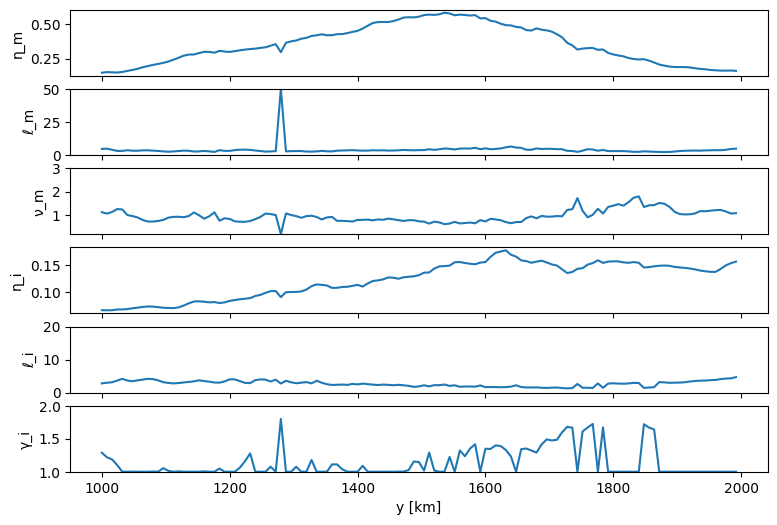

In [114]:
labels=['η_m','ℓ_m', 'ν_m','η_i','ℓ_i', 'γ_i']
x = ds_out['nav_lat_vy'].values/1000

plt.figure(figsize=(9,6))
ax=plt.subplot(611)
plt.plot(x,paramsout[:,0])
plt.ylabel(labels[0])
ax.set_xticklabels([])

ax=plt.subplot(612)
plt.plot(x,paramsout[:,1])
plt.ylabel(labels[1])
ax.set_xticklabels([])
plt.ylim(bounds[1])
        
ax=plt.subplot(613)
plt.plot(x,paramsout[:,2])
plt.ylabel(labels[2])
ax.set_xticklabels([])
plt.ylim(bounds[2])

ax=plt.subplot(614)
plt.plot(x,paramsout[:,3])
plt.ylabel(labels[3])
ax.set_xticklabels([])

ax=plt.subplot(615)
plt.plot(x,paramsout[:,4])
plt.ylabel(labels[4])
ax.set_xticklabels([])
plt.ylim(bounds[4])


plt.subplot(616)
plt.plot(x,paramsout[:,5])
plt.ylabel(labels[5])
plt.ylim(bounds[5])

plt.xlabel('y [km]')
plt.savefig('../FIGURES/PK2015_ROMS_params_maternitgamma_{}.png'.format(scenario), dpi=150)

In [118]:
import seaborn as sns

In [116]:
import pandas as pd

/home/jupyter-mrayson/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


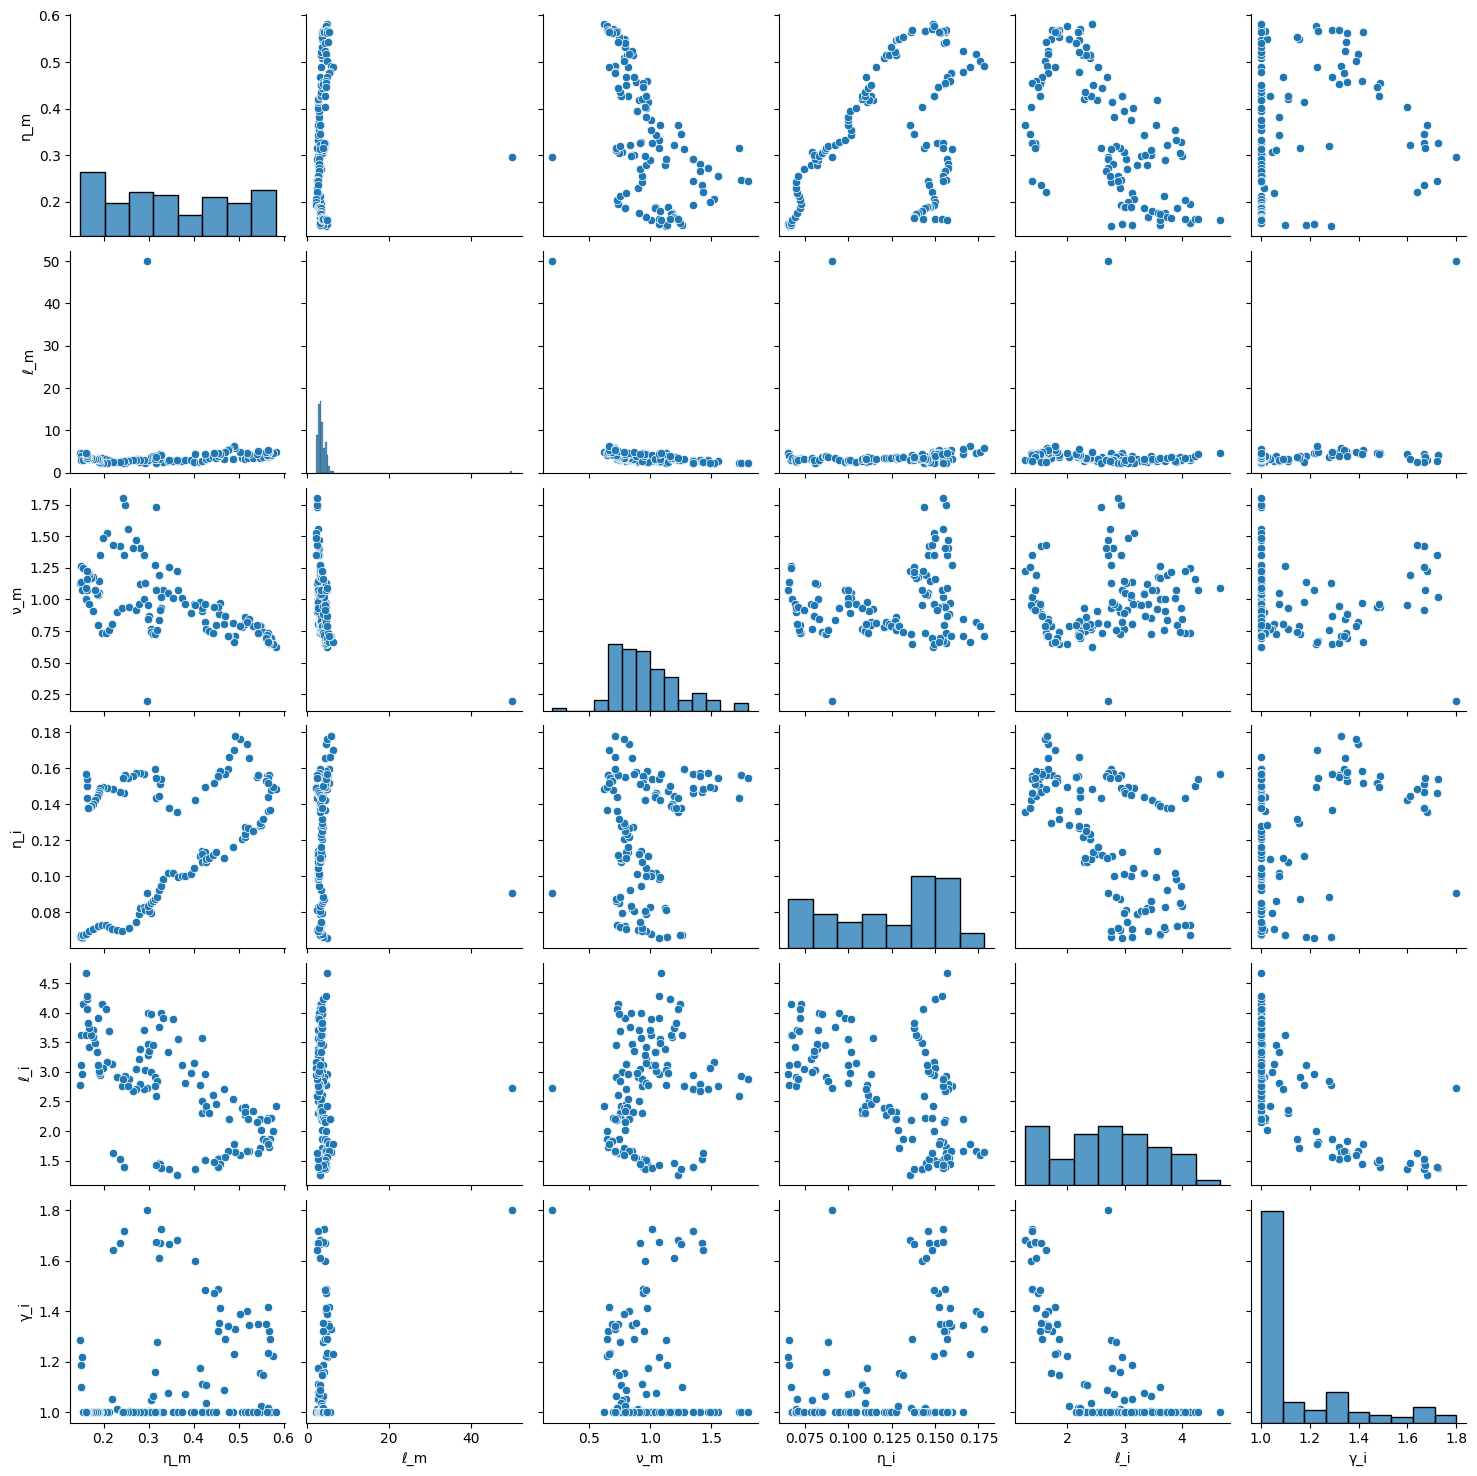

In [117]:
sns.pairplot(pd.DataFrame(paramsout, columns=labels))